In [1]:
import re 
import nltk 
import string
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore") 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

In [2]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import plotly
plotly.offline.init_notebook_mode(connected=True)

In [3]:
import string

In [4]:
data = pd.read_csv("Own_Dataset.csv",encoding='latin-1')
data.head()

,message,label
0,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1
1,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0
2,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0
3,hahah daniel aww you cried thats a sign that i must see this movie lol,0
4,ah yeah robpattznews is always on top of this love her,0


In [5]:
data.shape

(45218, 2)

In [6]:
print("Total Reviews:",len(data),
      "\nTotal Positive or Not Depression Reviews:",len(data[data.label ==0]),
      "\nTotal Negative or Depression Reviews:",len(data[data.label==1]))

Total Reviews: 45218 
Total Positive or Not Depression Reviews: 26335 
Total Negative or Depression Reviews: 18883


(array([0, 1]), [Text(0, 0, '0'), Text(0, 1, '1')])

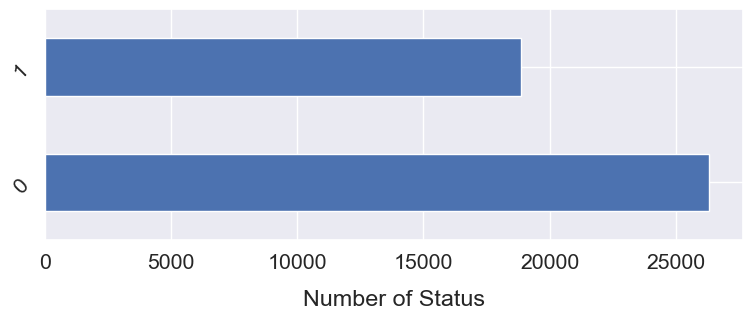

In [7]:
sns.set(font_scale=1.4)
data['label'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Status", labelpad=12)
plt.yticks(rotation = 45)

In [8]:
positif_data = data[data.label==0].iloc[:25000,:]
print(positif_data.shape)
negative_data = data[data.label==1].iloc[:1000,:]
print(negative_data.shape)

(25000, 2)
(1000, 2)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45218 entries, 0 to 45217
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  45218 non-null  object
 1   label    45218 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 706.7+ KB


In [10]:
data.isnull().sum()

message    0
label      0
dtype: int64

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stopwords=nltk.corpus.stopwords.words('english')

In [13]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [14]:
data['Clean_message'] = data['message'].str.replace("@", "") 
data.head()

,message,label,Clean_message
0,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...
1,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere
2,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr
3,hahah daniel aww you cried thats a sign that i must see this movie lol,0,hahah daniel aww you cried thats a sign that i must see this movie lol
4,ah yeah robpattznews is always on top of this love her,0,ah yeah robpattznews is always on top of this love her


In [15]:
data['Clean_message'] = data['Clean_message'].str.replace(r"http\S+", "") 
data.head()

,message,label,Clean_message
0,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...
1,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere
2,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,dubais new airport expected to be the worlds largest delayed until june sensible
3,hahah daniel aww you cried thats a sign that i must see this movie lol,0,hahah daniel aww you cried thats a sign that i must see this movie lol
4,ah yeah robpattznews is always on top of this love her,0,ah yeah robpattznews is always on top of this love her


In [16]:
data['Clean_message'] = data['Clean_message'].str.replace("[^a-zA-Z]", " ") 
data.head()

,message,label,Clean_message
0,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...
1,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere
2,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,dubais new airport expected to be the worlds largest delayed until june sensible
3,hahah daniel aww you cried thats a sign that i must see this movie lol,0,hahah daniel aww you cried thats a sign that i must see this movie lol
4,ah yeah robpattznews is always on top of this love her,0,ah yeah robpattznews is always on top of this love her


In [17]:
data['Clean_message'] = data['Clean_message'].apply(lambda text : remove_stopwords(text.lower()))
data.head()

,message,label,Clean_message
0,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,everything hard life hard difficult everything fail give things difficult incompetent brain body really wish never born sometimes could new life completely different person dont see keep going lif...
1,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,simonmagus never need excuse long lunch spain fact think theres royal decree somewhere
2,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,dubais new airport expected worlds largest delayed june sensible
3,hahah daniel aww you cried thats a sign that i must see this movie lol,0,hahah daniel aww cried thats sign must see movie lol
4,ah yeah robpattznews is always on top of this love her,0,ah yeah robpattznews always top love


In [18]:
data['Clean_message'] = data['Clean_message'].apply(lambda x: x.split())
data.head()

,message,label,Clean_message
0,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,"[everything, hard, life, hard, difficult, everything, fail, give, things, difficult, incompetent, brain, body, really, wish, never, born, sometimes, could, new, life, completely, different, person..."
1,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,"[simonmagus, never, need, excuse, long, lunch, spain, fact, think, theres, royal, decree, somewhere]"
2,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,"[dubais, new, airport, expected, worlds, largest, delayed, june, sensible]"
3,hahah daniel aww you cried thats a sign that i must see this movie lol,0,"[hahah, daniel, aww, cried, thats, sign, must, see, movie, lol]"
4,ah yeah robpattznews is always on top of this love her,0,"[ah, yeah, robpattznews, always, top, love]"


In [19]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
data['Clean_message'] = data['Clean_message'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,message,label,Clean_message
0,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,"[everyth, hard, life, hard, difficult, everyth, fail, give, thing, difficult, incompet, brain, bodi, realli, wish, never, born, sometim, could, new, life, complet, differ, person, dont, see, keep,..."
1,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,"[simonmagu, never, need, excus, long, lunch, spain, fact, think, there, royal, decre, somewher]"
2,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,"[dubai, new, airport, expect, world, largest, delay, june, sensibl]"
3,hahah daniel aww you cried thats a sign that i must see this movie lol,0,"[hahah, daniel, aww, cri, that, sign, must, see, movi, lol]"
4,ah yeah robpattznews is always on top of this love her,0,"[ah, yeah, robpattznew, alway, top, love]"


In [20]:
data['Clean_message'] = data['Clean_message'].apply(lambda x: ' '.join([w for w in x]))
data.head()

,message,label,Clean_message
0,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,everyth hard life hard difficult everyth fail give thing difficult incompet brain bodi realli wish never born sometim could new life complet differ person dont see keep go life like play favorit g...
1,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,simonmagu never need excus long lunch spain fact think there royal decre somewher
2,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,dubai new airport expect world largest delay june sensibl
3,hahah daniel aww you cried thats a sign that i must see this movie lol,0,hahah daniel aww cri that sign must see movi lol
4,ah yeah robpattznews is always on top of this love her,0,ah yeah robpattznew alway top love


In [21]:
data['Clean_message'] = data['Clean_message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,message,label,Clean_message
0,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,everyth hard life hard difficult everyth fail give thing difficult incompet brain bodi realli wish never born sometim could life complet differ person dont keep life like play favorit game time fe...
1,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,simonmagu never need excus long lunch spain fact think there royal decre somewher
2,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,dubai airport expect world largest delay june sensibl
3,hahah daniel aww you cried thats a sign that i must see this movie lol,0,hahah daniel that sign must movi
4,ah yeah robpattznews is always on top of this love her,0,yeah robpattznew alway love


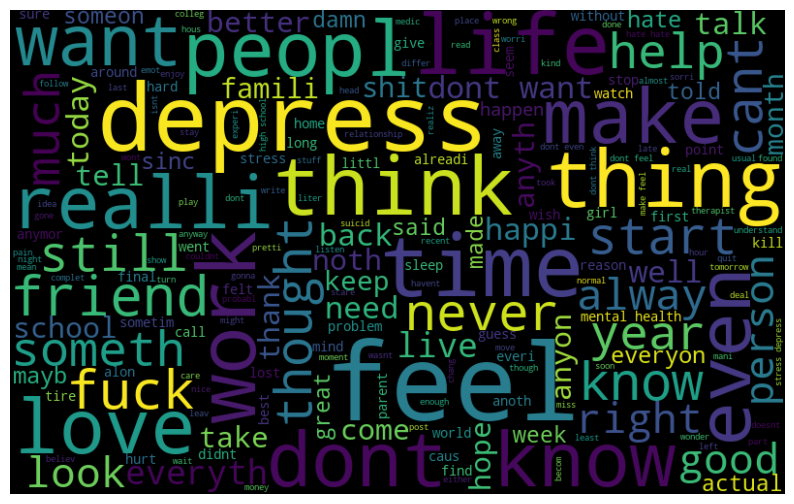

In [22]:
all_words = ' '.join([text for text in data['Clean_message']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

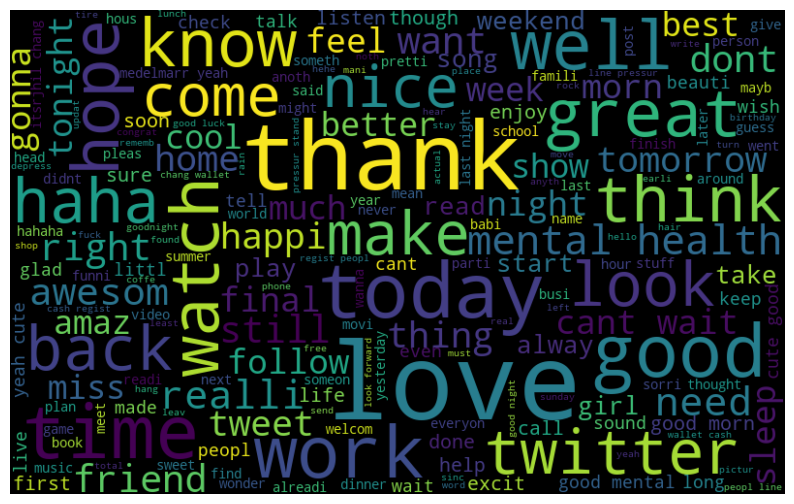

In [23]:
positive_words =' '.join([text for text in data['Clean_message'][data['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

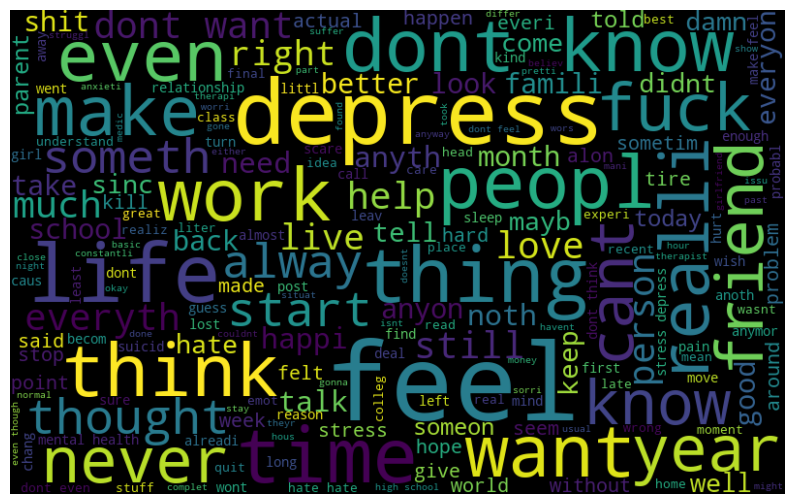

In [24]:
depressive_words =' '.join([text for text in data['Clean_message'][data['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depressive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [25]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [27]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(data['Clean_message'])
cv.shape

(45218, 53405)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(cv,data['label'] , test_size=.2,stratify=data['label'], random_state=42)


In [29]:
print(cv.shape, X_train.shape, X_test.shape )

(45218, 53405) (36174, 53405) (9044, 53405)


In [30]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuraccy : ",accuracy_score(prediction_lr,y_test))

Precision: 0.9667036625971143
Recall: 0.9224252051893037
F1 Score: 0.944045522286953
Accuraccy :  0.9543343653250774


In [31]:
mn = MultinomialNB()
mn.fit(X_train,y_train)
prediction_mn = mn.predict(X_test)

# Make predictions on the testing set
y_pred = mn.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuraccy :",accuracy_score(prediction_lr,y_test))

Precision: 0.8171573137074517
Recall: 0.9406936722266349
F1 Score: 0.8745846153846153
Accuraccy : 0.9543343653250774


In [32]:
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)

# Make predictions on the testing set
y_pred = xgbc.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision : ", precision)
print("Recall : ", recall)
print("F1 Score : ", f1)

print("Accuracy : ",accuracy_score(prediction_xgb,y_test))

Precision :  0.9631578947368421
Recall :  0.920571882446386
F1 Score :  0.9413835115743874
Accuracy :  0.9521229544449359


In [33]:
adc = AdaBoostClassifier(n_estimators=1000, random_state=0)
adc.fit(X_train, y_train)
prediction_adc = adc.predict(X_test)

# Make predictions on the testing set
y_pred = adc.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision : ", precision)
print("Recall : ", recall)
print("F1 Score : ", f1)
print("Accuracy : ",accuracy_score(prediction_adc,y_test))

Precision :  0.9527342676559495
Recall :  0.9179242785279322
F1 Score :  0.9350053937432579
Accuracy :  0.9467049977885891


In [34]:
svc = svm.SVC()
svc.fit(X_train,y_train)
prediction_svc = svc.predict(X_test)

# Make predictions on the testing set
y_pred = svc.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision : ", precision)
print("Recall : ", recall)
print("F1 Score : ", f1)

print("Accuracy : ",accuracy_score(prediction_svc,y_test))

Precision :  0.9700196133370692
Recall :  0.9166004765687054
F1 Score :  0.9425537707595971
Accuracy :  0.9533392304290137


In [35]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision : ", precision)
print("Recall : ", recall)
print("F1 Score : ", f1)

print("Accuracy : ",accuracy_score(prediction_rf,y_test))

Precision :  0.9553179824561403
Recall :  0.922689965581149
F1 Score :  0.9387205387205387
Accuracy :  0.9496904024767802


In [36]:
mdel_1 = LogisticRegression()
mdel_2 = svm.SVC()
mdel_3 = XGBClassifier()
mdel_4 = RandomForestClassifier()
mdel_5 = AdaBoostClassifier()
mdel_6 = MultinomialNB()

In [37]:
mdel_1.fit(X_train, y_train)
mdel_2.fit(X_train, y_train)
mdel_3.fit(X_train, y_train)
mdel_4.fit(X_train, y_train)
mdel_5.fit(X_train, y_train)
mdel_6.fit(X_train, y_train)

MultinomialNB()

In [38]:
pred_1 = mdel_1.predict(X_test)
pred_2 = mdel_2.predict(X_test)
pred_3 = mdel_3.predict(X_test)
pred_4 = mdel_4.predict(X_test)
pred_5 = mdel_5.predict(X_test)
pred_6 = mdel_6.predict(X_test)

In [39]:
mdel_1.score(X_test,y_test)
mdel_2.score(X_test,y_test)
mdel_3.score(X_test,y_test)
mdel_4.score(X_test,y_test)
mdel_5.score(X_test,y_test)
mdel_6.score(X_test,y_test)

0.887328615656789

In [40]:
from sklearn.model_selection import train_test_split #Adding
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [41]:
pred_final = (pred_1 + pred_2 + pred_3 + pred_4 + pred_5)/6.0
print("The total mean squared error : ",mean_squared_error(y_test, pred_final))

The total mean squared error :  0.04963388864317656


In [42]:
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(estimators=[('lr', mdel_1), ('svc', mdel_2),('xgbc',mdel_3), ('rf', mdel_4),('adc',mdel_5),('mn',mdel_6),], voting='hard')

# training all the model on the train dataset
final_model.fit(X_train, y_train)

pred_final_2 = final_model.predict(X_test)

mean_squared_error(y_test, pred_final_2)

print("The final Score : ",final_model.score(X_test,y_test))

The final Score :  0.9535603715170279
